# Using Machine Learning Tools Assignment 1

## Overview

In this assignment, you will apply some popular machine learning techniques to the problem of predicting bike rental demand. A data set has been provided containing records of bike rentals in Seoul, collected during 2017-18.

The main aims of the prac are:

- to practice using tools for loading and viewing data sets;
- to visualise data in several ways and check for common pitfalls;
- to plan a simple experiment and prepare the data accordingly;
- to run your experiment and to report and interpret your results clearly and concisely.

This assignment relates to the following ACS CBOK areas: abstraction, design, hardware and software, data and information, HCI and programming.

## General instructions

This assignment is divided into several tasks. Use the spaces provided in this notebook to answer the questions posed in each task. Note that some questions require writing a small amount of code, some require graphical results, and some require comments or analysis as text. It is your responsibility to make sure your responses are clearly labelled and your code has been fully executed (with the correct results displayed) before submission!

**Do not** manually edit the data set file we have provided! For marking purposes, it's important that your code is written to run correctly on the original data file.

When creating graphical output, label is clearly, with appropriate titles, xlabels and ylabels, as appropriate.

Most of the tasks in this assignment only require writing a few lines of code! One goal of the assignment is explore [sklearn](https://scikit-learn.org/stable/index.html), [pandas](https://pandas.pydata.org/pandas-docs/stable/index.html), [matplotlib](https://matplotlib.org/stable/index.html) and other libraries you will find useful throughout the course, so feel free to use the functions they provide. You are expected to search and carefully read the documentation for functions that you use, to ensure you are using them correctly.

Chapter 2 of the reference book is based on a similar workflow to this prac, so you may look there for some further background and ideas. You can also use any other general resources on the internet that are relevant although do not use ones which directly relate to these questions with this dataset (which would normally only be found in someone else's assignment answers). If you take a large portion of code or text from the internet then you should reference where this was taken from, but we do not expect any references for small pieces of code, such as from documentation, blogs or tutorials. Taking, and adapting, small portions of code is expected and is common practice when solving real problems.

The following code imports some of the essential libraries that you will need. You should not need to modify it, but you are expected to import other libraries as needed.


In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

import sklearn
assert sklearn.__version__ >= "0.20"

import pandas as pd
assert pd.__version__ >= "1.0"

# Common imports
import numpy as np
import os

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

## Step 1: Loading and initial processing of the dataset (20%)

Download the data set from MyUni using the link provided on the assignment page. A paper that describes one related version of this dataset is: Sathishkumar V E, Jangwoo Park, and Yongyun Cho. 'Using data mining techniques for bike sharing demand prediction in metropolitan city.' Computer Communications, Vol.153, pp.353-366, March, 2020. Feel free to look at this if you want more information about the dataset.

The data is stored in a CSV (comma separated variable) file and contains the following information

 - Date: year-month-day
 - Rented Bike Count: Count of bikes rented at each hour
 - Hour: Hour of the day
 - Temperature: Temperature in Celsius
 - Humidity: %
 - Windspeed: m/s
 - Visibility: 10m
 - Dew point temperature: Celsius
 - Solar radiation: MJ/m2
 - Rainfall: mm
 - Snowfall: cm
 - Seasons: Winter, Spring, Summer, Autumn
 - Holiday: Holiday/No holiday
 - Functional Day: NoFunc(Non Functional Hours), Fun(Functional hours)

**Load the data set from the csv file into a DataFrame, and summarise it with at least two appropriate pandas functions.**

In [2]:
### Your code here
df = pd.read_csv('SeoulBikeData.csv')
df.head()

,Date,Rented Bike Count,Hour,Temperature (C),Humidity (%),Wind speed (m/s),Visibility (10m),Dew point temperature (C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0,0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0,0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0,0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0,0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0,0,Winter,No Holiday,Yes


In [3]:
df.info()    #check for the number of values and data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature (C)            8760 non-null   float64
 4   Humidity (%)               8760 non-null   int64  
 5   Wind speed (m/s)           8759 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature (C)  8759 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8758 non-null   object 
 10  Snowfall (cm)              8760 non-null   object 
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [4]:
df.describe() #check data distribution and statistical data of each column

,Rented Bike Count,Hour,Temperature (C),Humidity (%),Wind speed (m/s),Visibility (10m),Dew point temperature (C),Solar Radiation (MJ/m2)
count,8760.000000,8760.000000,8760.000000,8760.000000,8759.000000,8760.000000,8759.000000,8760.000000
mean,704.602055,11.502740,12.914361,58.240183,1.953237,1436.442808,4.074369,0.569111
std,644.997468,6.922779,12.347109,20.584774,21.376612,608.827735,13.061011,0.868746
min,0.000000,0.000000,-17.800000,-26.000000,0.000000,-678.000000,-30.600000,0.000000
25%,191.000000,6.000000,3.500000,42.000000,0.900000,939.500000,-4.700000,0.000000
50%,504.500000,12.000000,13.700000,57.000000,1.500000,1697.500000,5.100000,0.010000
75%,1065.250000,18.000000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000
max,3556.000000,24.000000,306.000000,309.000000,2000.000000,2000.000000,27.200000,3.520000


In [5]:
df.shape   #check the number of columns and rows

(8760, 14)

Discussion about the dataset:

- Advantages: after a quick look at the data, we can see this dataset contains a large number of data, 8760 samples. This data just missing two values in the 'Wind speed' and the 'Dew point temperature (C)' features.
In addition, the dataset contains 13 features, which are important features for predicting and modelling.

- Disadvantages: data contains a lot of types of data such as object, int64 or float64 in info() functions or missing data in describe() functions, which means this dataset need be more pre-processing steps before it will be used for training or predicting.

### 1.2 Initial visualisation

To get a feeling for the data it is a good idea to do some form of simple visualisation.  **Display a set of histograms for the features** as they are right now, prior to any cleaning steps.

array([[<AxesSubplot:title={'center':'Rented Bike Count'}>,
        <AxesSubplot:title={'center':'Hour'}>,
        <AxesSubplot:title={'center':'Temperature (C)'}>],
       [<AxesSubplot:title={'center':'Humidity (%)'}>,
        <AxesSubplot:title={'center':'Wind speed (m/s)'}>,
        <AxesSubplot:title={'center':'Visibility (10m)'}>],
       [<AxesSubplot:title={'center':'Dew point temperature (C)'}>,
        <AxesSubplot:title={'center':'Solar Radiation (MJ/m2)'}>,
        <AxesSubplot:>]], dtype=object)

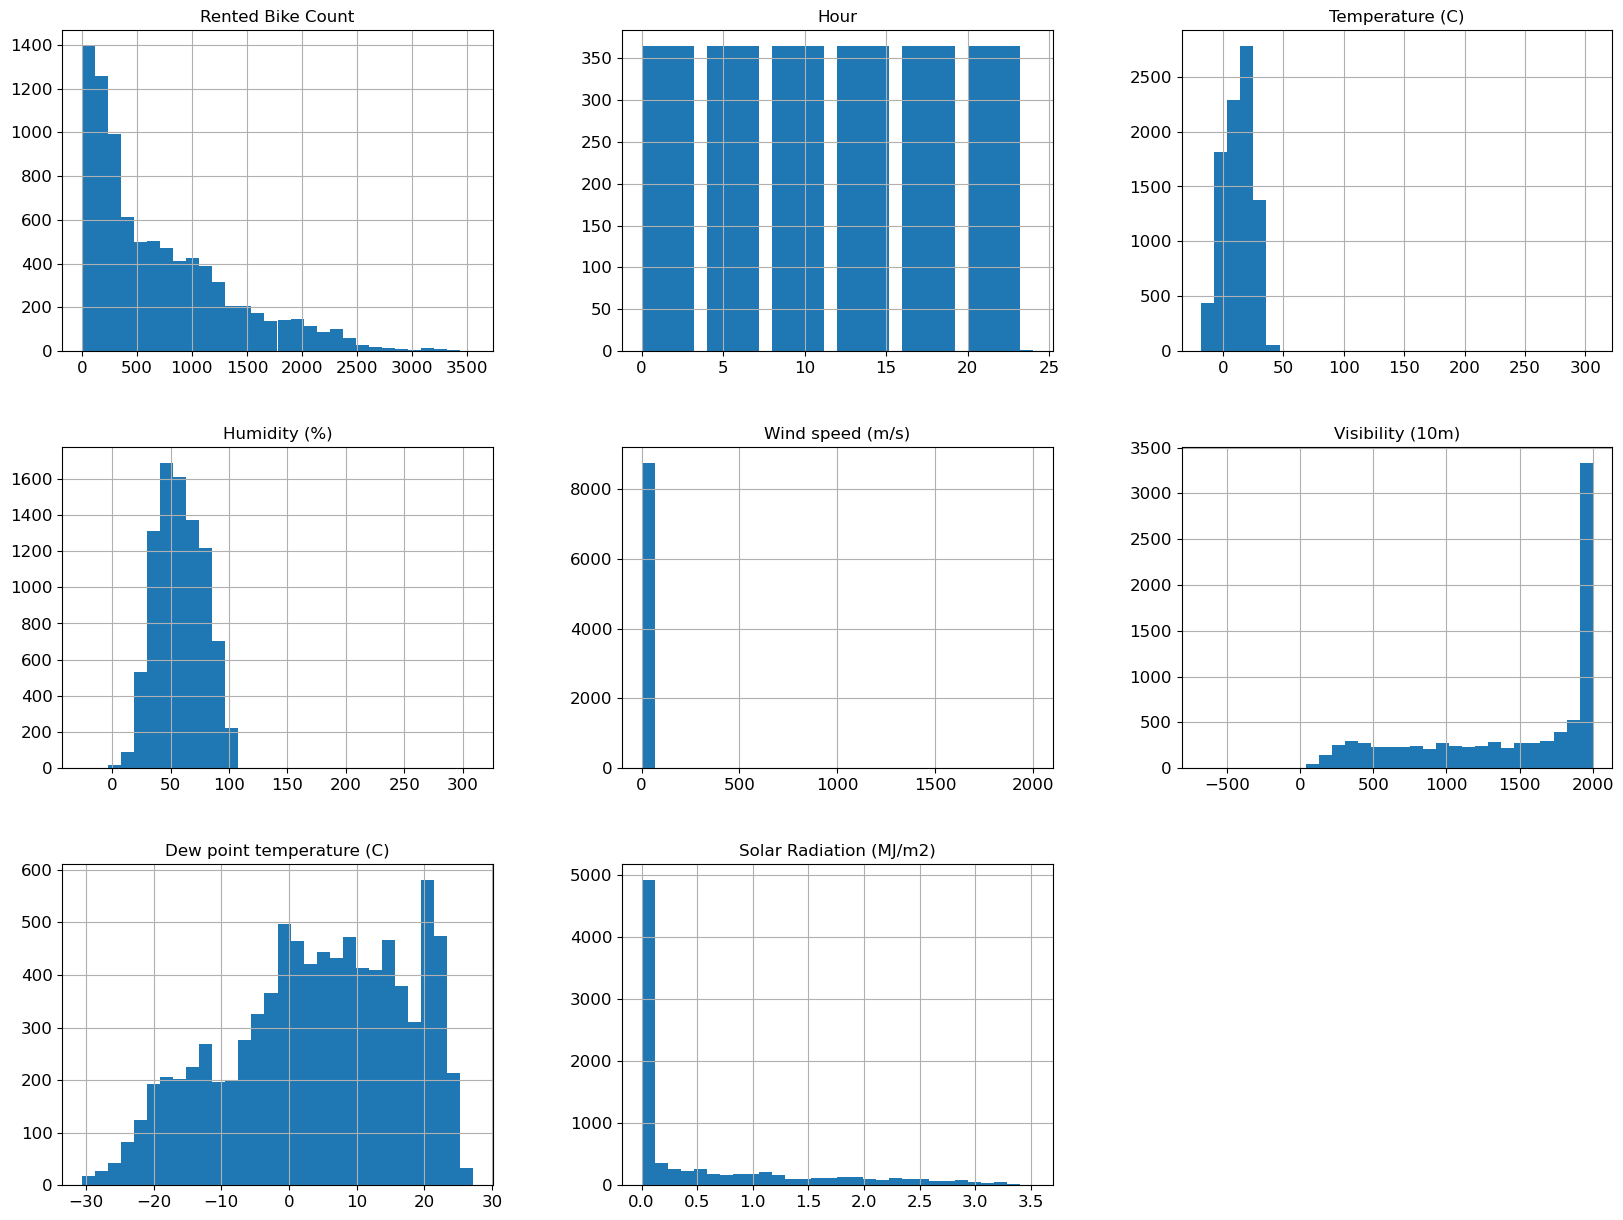

In [6]:
### Your code here
df.hist(bins= 30, figsize=(20,15))

### 1.3 Removing unwanted information

The "Functioning day" feature records whether the bike rental was open for business on that day. For this assignment we are only interested in predicting demand on days when the business is open, so **remove rows from the DataFrame where the business is closed.** Hint: you can use the `DataFrame.loc()` function to do this. As a sanity check, ensure that the rows you are removing contain zero bike rentals! **After doing this, delete the Functioning Day feature from the DataFrame** and verify that this worked.

In [7]:
### Your code here
df = df.loc[df['Functioning Day'] == 'Yes']
df = df.drop('Functioning Day', axis=1)
df

,Date,Rented Bike Count,Hour,Temperature (C),Humidity (%),Wind speed (m/s),Visibility (10m),Dew point temperature (C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0,0,Winter,No Holiday
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0,0,Winter,No Holiday
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0,0,Winter,No Holiday
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0,0,Winter,No Holiday
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0,0,Winter,No Holiday
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0,0,Autumn,No Holiday
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0,0,Autumn,No Holiday
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0,0,Autumn,No Holiday
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0,0,Autumn,No Holiday


### 1.4 Numerical encoding

The main task is to predict future bike rental demand from this data. Hence the target feature is "Bike Rental Count". You will use regression techniques to do this, but this requires that the other features are numerical.

The Holiday and Season features both need to be converted to a simple numerical format. **Write code to convert the Holiday feature to 0 or 1 from its current format.**

In [8]:
### Your code here
df['Holiday'] = df['Holiday'].map({'Holiday': 1, 'No Holiday': 0})

The Season feature is a little tricker. A number could be assigned to each season, but a better solution in this case is to **add 4 new columns**, each labelled by a season, and each storing 0 or 1 according to the season in each row. In other words, the "Winter" column contains 1 whenever the season is winter, and 0 elsewhere. **Do this for each season. Afterwards, remember to delete the Season feature.**

In [9]:
### Your code here
df[df['Seasons'].unique()] = 0
#set the value of each season to 1
df.loc[df.Seasons == 'Winter', 'Winter'] = 1
df.loc[df.Seasons == 'Spring', 'Spring'] = 1
df.loc[df.Seasons == 'Summer', 'Summer'] = 1
df.loc[df.Seasons == 'Autumn', 'Autumn'] = 1
#delete the Seasons column
df.drop(columns=['Seasons'], inplace = True)
df

,Date,Rented Bike Count,Hour,Temperature (C),Humidity (%),Wind speed (m/s),Visibility (10m),Dew point temperature (C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Holiday,Winter,Spring,Summer,Autumn
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0,0,0,1,0,0,0
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0,0,0,1,0,0,0
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0,0,0,1,0,0,0
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0,0,0,1,0,0,0
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0,0,0,0,0,0,1
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0,0,0,0,0,0,1
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0,0,0,0,0,0,1
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0,0,0,0,0,0,1


It is known that bike rentals depend strongly on whether it's a weekday or a weekend. **Replace the Date feature with a Weekday feature that stores 0 or 1 depending on whether the date represents a weekend or weekday.**  To do this, use the function `date_is_weekday` below, which returns 1 if it is a weekday and 0 if it is a weekend.

**Apply the function to the Date column in your DataFrame** (you can use `DataFrame.transform` to apply it).

In [10]:
import datetime
def date_is_weekday(datestring):
    ### return 0 if weekend, 1 if weekday
    dsplit = datestring.split('/')
    wday = datetime.datetime(int(dsplit[2]),int(dsplit[1]),int(dsplit[0])).weekday()
    return int(wday<=4)

### Your code to apply the function here:
df['Date'] = df['Date'].transform(date_is_weekday)
df.rename(columns={'Date': 'Weekday'}, inplace=True) #rename the column
df

,Weekday,Rented Bike Count,Hour,Temperature (C),Humidity (%),Wind speed (m/s),Visibility (10m),Dew point temperature (C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Holiday,Winter,Spring,Summer,Autumn
0,1,254,0,-5.2,37,2.2,2000,-17.6,0.0,0,0,0,1,0,0,0
1,1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0,0,0,1,0,0,0
2,1,173,2,-6.0,39,1.0,2000,-17.7,0.0,0,0,0,1,0,0,0
3,1,107,3,-6.2,40,0.9,2000,-17.6,0.0,0,0,0,1,0,0,0
4,1,78,4,-6.0,36,2.3,2000,-18.6,0.0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,1,1003,19,4.2,34,2.6,1894,-10.3,0.0,0,0,0,0,0,0,1
8756,1,764,20,3.4,37,2.3,2000,-9.9,0.0,0,0,0,0,0,0,1
8757,1,694,21,2.6,39,0.3,1968,-9.9,0.0,0,0,0,0,0,0,1
8758,1,712,22,2.1,41,1.0,1859,-9.8,0.0,0,0,0,0,0,0,1


**Convert all the remaining data to numerical format**, with any non-numerical entries set to NaN.

In [11]:
### Your code here
df = df.apply(pd.to_numeric, errors='coerce')  #convert all columns to numeric
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8465 entries, 0 to 8759
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Weekday                    8465 non-null   int64  
 1   Rented Bike Count          8465 non-null   int64  
 2   Hour                       8465 non-null   int64  
 3   Temperature (C)            8465 non-null   float64
 4   Humidity (%)               8465 non-null   int64  
 5   Wind speed (m/s)           8464 non-null   float64
 6   Visibility (10m)           8465 non-null   int64  
 7   Dew point temperature (C)  8464 non-null   float64
 8   Solar Radiation (MJ/m2)    8465 non-null   float64
 9   Rainfall(mm)               8440 non-null   float64
 10  Snowfall (cm)              8442 non-null   float64
 11  Holiday                    8465 non-null   int64  
 12  Winter                     8465 non-null   int64  
 13  Spring                     8465 non-null   int64

## Step 2: Visualise the data and perform further processing (20%)

### 2.1 Visualisation

Use **at least two graphical methods to display your data** and **identify** problematic entries. **Write one sentence** that summarises what you found about problematic entries.

In [12]:
### Your code here
df.hist( xlabelsize= 10, xrot = 30, ylabelsize =10, bins=30, grid=False, figsize=(20,20), sharex=True, zorder=2, rwidth=0.8) #draw histogram

array([[<AxesSubplot:title={'center':'Weekday'}>,
        <AxesSubplot:title={'center':'Rented Bike Count'}>,
        <AxesSubplot:title={'center':'Hour'}>,
        <AxesSubplot:title={'center':'Temperature (C)'}>],
       [<AxesSubplot:title={'center':'Humidity (%)'}>,
        <AxesSubplot:title={'center':'Wind speed (m/s)'}>,
        <AxesSubplot:title={'center':'Visibility (10m)'}>,
        <AxesSubplot:title={'center':'Dew point temperature (C)'}>],
       [<AxesSubplot:title={'center':'Solar Radiation (MJ/m2)'}>,
        <AxesSubplot:title={'center':'Rainfall(mm)'}>,
        <AxesSubplot:title={'center':'Snowfall (cm)'}>,
        <AxesSubplot:title={'center':'Holiday'}>],
       [<AxesSubplot:title={'center':'Winter'}>,
        <AxesSubplot:title={'center':'Spring'}>,
        <AxesSubplot:title={'center':'Summer'}>,
        <AxesSubplot:title={'center':'Autumn'}>]], dtype=object)

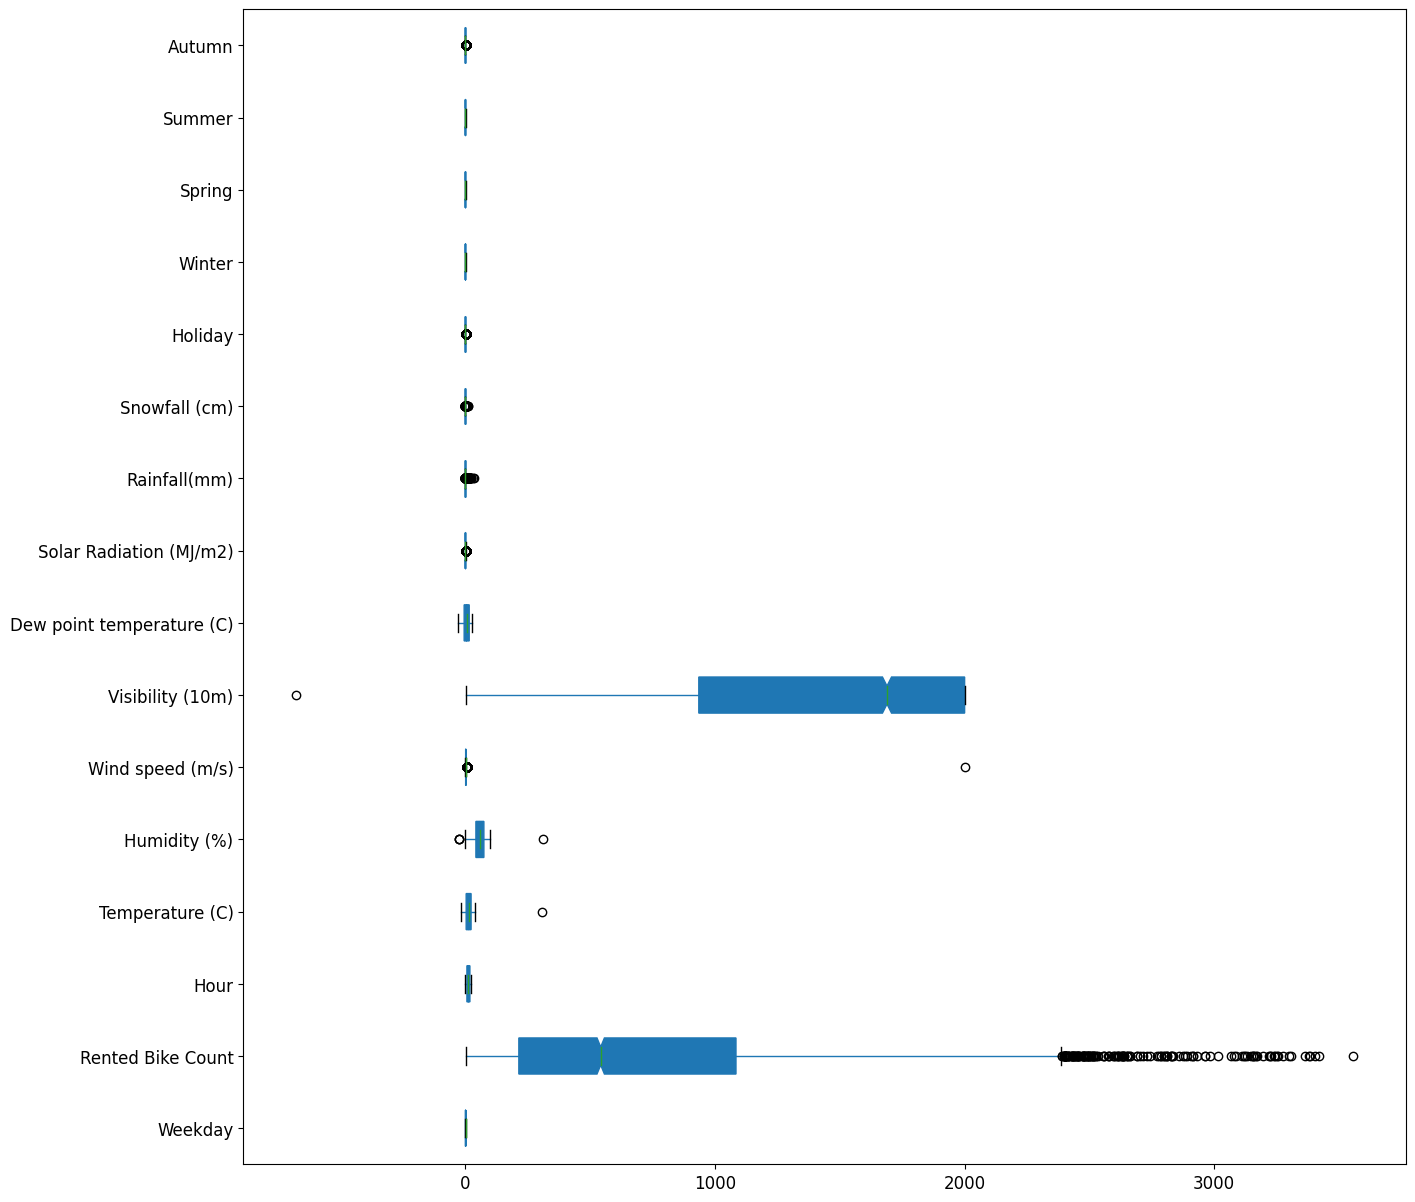

In [ ]:
boxplot = df.boxplot(grid=False, patch_artist = True, notch ='True',figsize=(15,15), vert = 0)

In [ ]:
### Your summary sentence about problematic entries


With two plots above, we can easily see the first problematic entries is the outliers of data. It appears in some fetures such as 'Visibility (10m)', 'Wind speed (m/s)', 'Humidity (%)', or 'Temperature'. Secondly, the two plots also demonstrated the range of all features not the same scale. In 'Visibility' witnessed almost values rather than 1000, or 'Humidity' and 'Temperature' are aslo too high compared with the others.

### 2.2 Imputation and Pre-Processing

**Set any problematic values** in the numerical data to `np.nan` and check that this has worked. Once this is done, specify a **sklearn *pipeline* that will perform imputation** to replace problematic entries (nan values) with an appropriate **median** value ***and* any other pre-processing** that you think should be used. Just specify the pipeline - do ***not*** run it now.

In [ ]:
### Your code here
# Set any problematic values in the numerical data to np.nan
df.loc[df['Temperature (C)'] > 100,'Temperature (C)'] = np.nan
df.loc[(df['Humidity (%)'] > 100) | (df['Humidity (%)'] < 0 ),'Humidity (%)'] = np.nan
df.loc[df['Visibility (10m)'] < 0,'Visibility (10m)'] = np.nan
df.loc[df['Wind speed (m/s)'] >= 1000,'Wind speed (m/s)'] = np.nan

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler


pipe = Pipeline([("imputer",SimpleImputer(missing_values=np.nan, strategy='median')),
                     ('std_scaler',MinMaxScaler())])

### 2.3 Correlation

It is also useful to look at how strongly correlated the features are to the desired target (Rented Bike Count). Before anything else is done it is necessary to **fit and apply the pipeline** above to make a *temporary* version of the whole dataset that is pre-processed. **Why is it important to not use this version of the pre-processed data again?**

In [ ]:
### Your code here
df_copy = df.copy()

X = df_copy.drop(columns = 'Rented Bike Count')
Y = df_copy['Rented Bike Count']

pipe.fit(X)
processed = pipe.transform(X)

In [ ]:
### Your written answer here


**Answer:**

- It is important not to use the pre-processed data again because it contains more noise such as missing data, outliers, or unscaled data. In addition, the data types are not inconsistent, such as float, nan, integer or empty, which makes model machine learning unable to implement because machine learning model work with numeric data.
- If we use this data again, it will make our model get bad performance or sometimes lead to underfitting or overfitting and it will not be able to predict the new data.


To visualise the strength of the relationships, display a **scatter plot** for each feature (separately) vs the target variable.  Also **calculate the correlation** of each feature with the target (Hint: pandas function `corr()` or numpy `corrcoef()`). **Which 3 attributes are the most correlated with bike rentals?**

<Figure size 2000x1500 with 0 Axes>

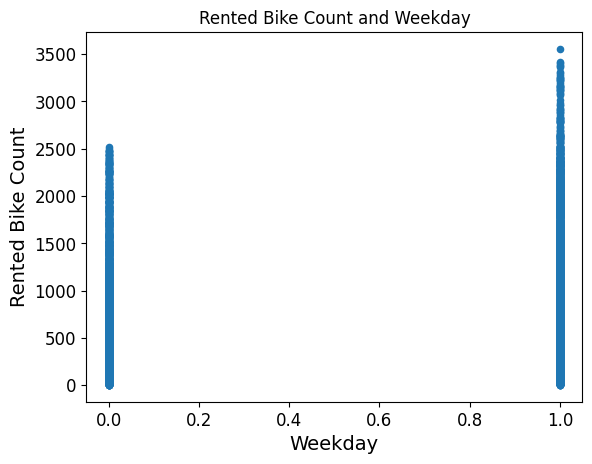

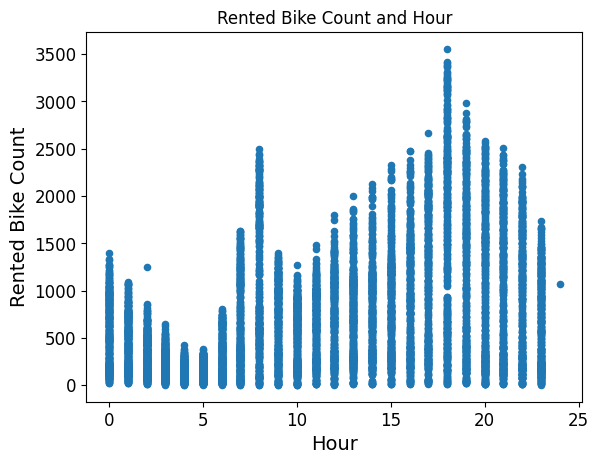

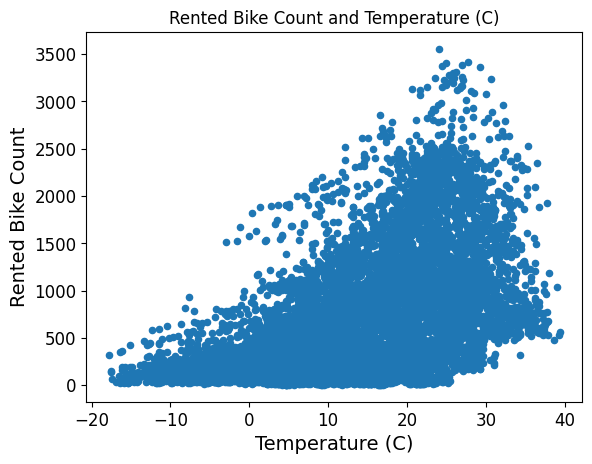

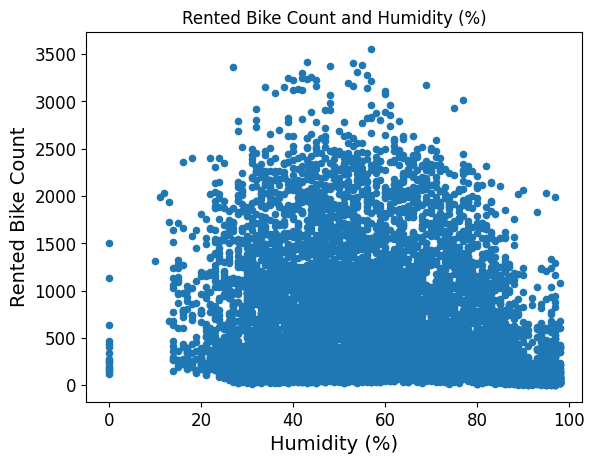

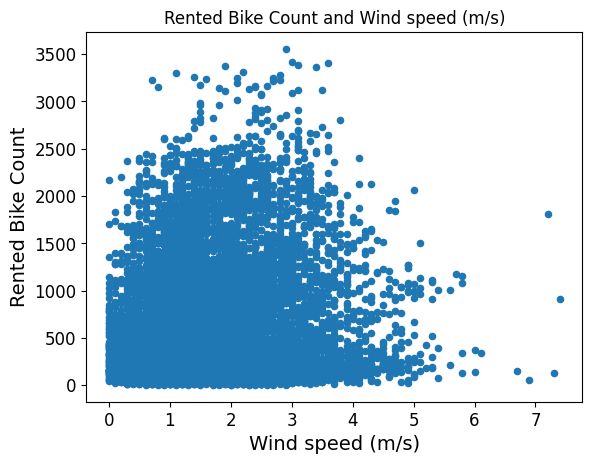

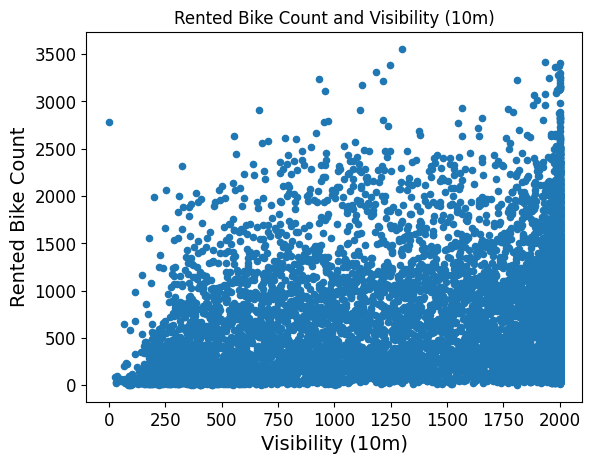

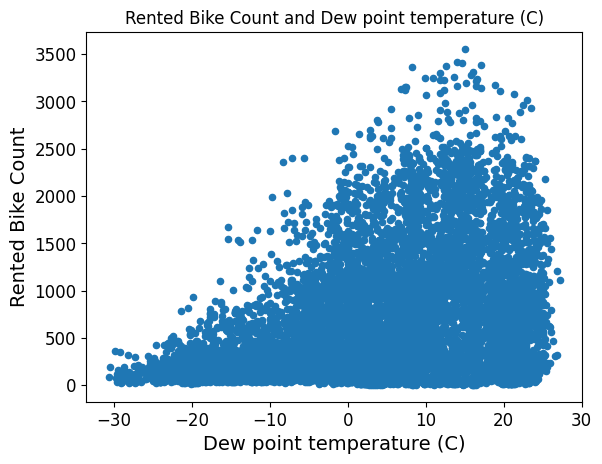

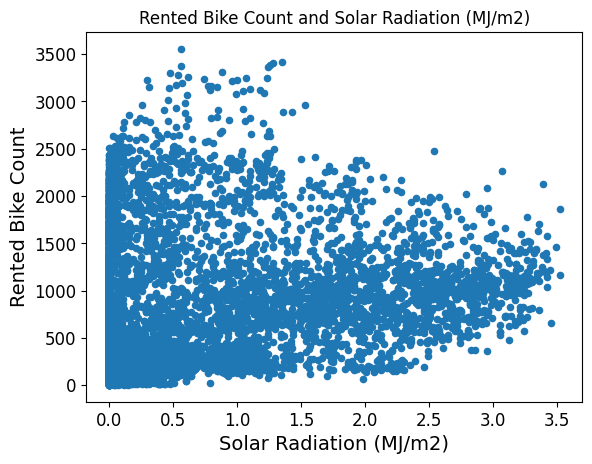

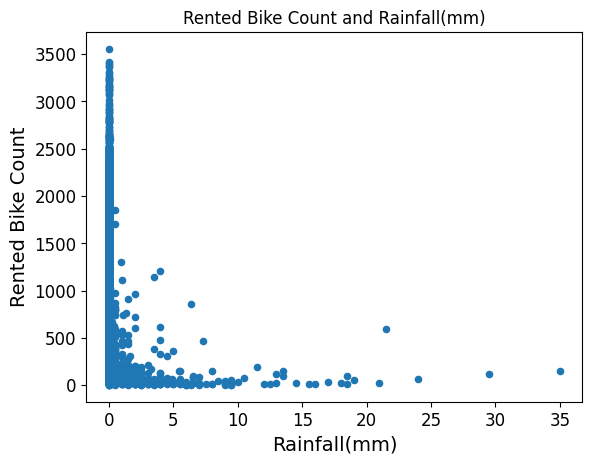

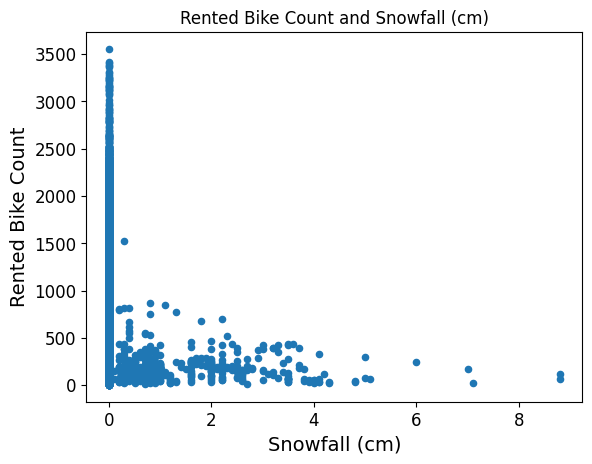

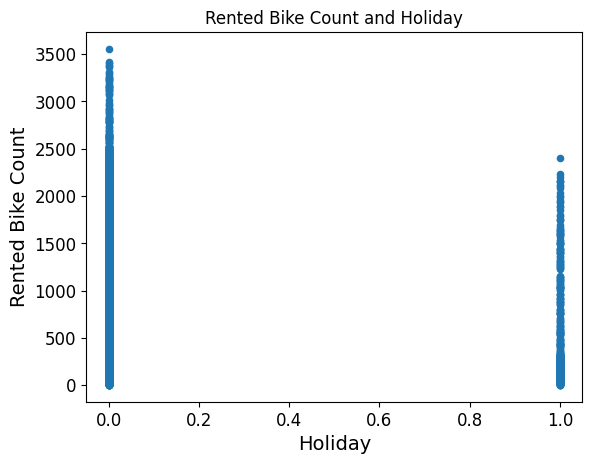

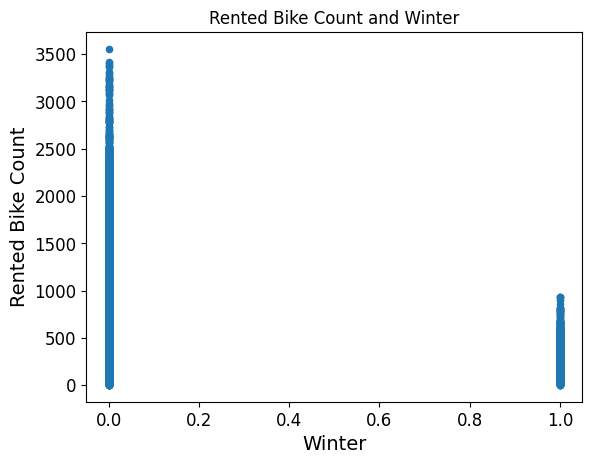

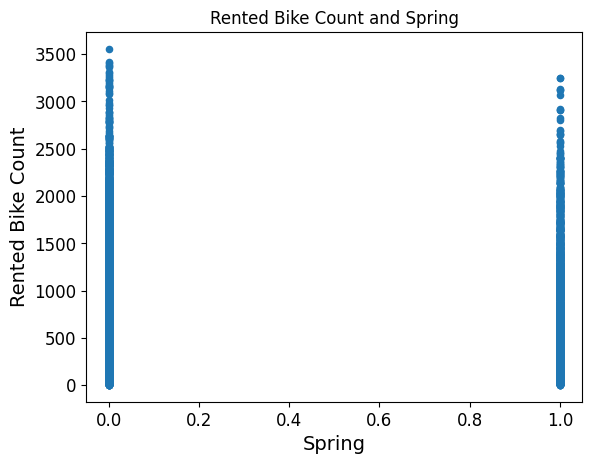

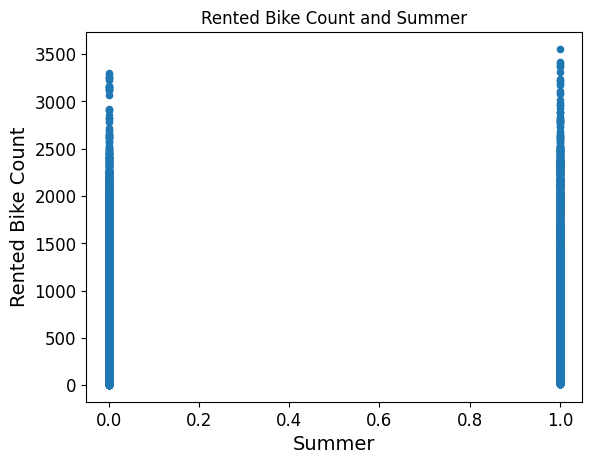

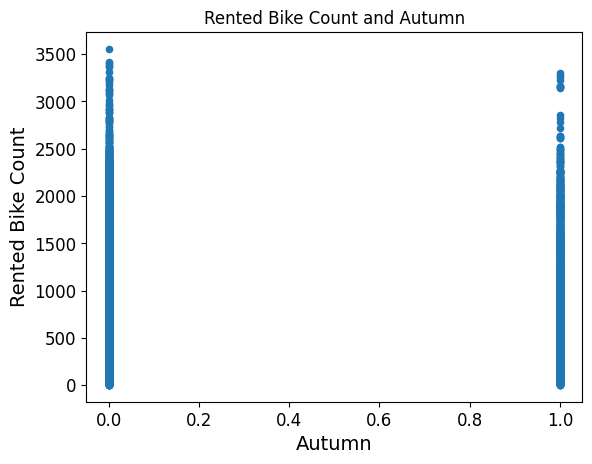

In [ ]:
cols = X.columns.values # Get columns name
plt.figure(figsize=(20,15))
for i in cols:
  df_copy.plot(kind ='scatter', x = i, y ='Rented Bike Count')
  plt.title(f'Rented Bike Count and {i}')

In [ ]:
correlation  = df_copy.corr()
print("The correlation fo each feature:\n", correlation["Rented Bike Count"])
print("\n\nThree most correclation features:\n", correlation["Rented Bike Count"].sort_values(ascending=False)[1:4])

The correlation fo each feature:
 Weekday                      0.046360
Rented Bike Count            1.000000
Hour                         0.425460
Temperature (C)              0.562774
Humidity (%)                -0.201755
Wind speed (m/s)             0.125295
Visibility (10m)             0.210968
Dew point temperature (C)    0.400248
Solar Radiation (MJ/m2)      0.273862
Rainfall(mm)                -0.129170
Snowfall (cm)               -0.152261
Holiday                     -0.070070
Winter                      -0.458920
Spring                       0.015580
Summer                       0.282001
Autumn                       0.165333
Name: Rented Bike Count, dtype: float64


Three most correclation features:
 Temperature (C)              0.562774
Hour                         0.425460
Dew point temperature (C)    0.400248
Name: Rented Bike Count, dtype: float64


In [ ]:
### Your written answers here


**Discussion:**

The scatter plot and the caculation of correclation show that the three most important parameters that link with target values - Rented Bike Count are temperature (0.56), hours (0.43), and dew point temperature (0.4). In addition, the other features also have a correlation with the target values, but it is not as strong as the three features above.

## Step 3: Predicting bike rentals (25%)

A regression approach will be used for this problem: that is, "bike rentals" will be treated as a real number whose value will be predicted. If necessary, it could be rounded to the nearest integer afterwards, but this will not be necessary here. The root mean squared error (rmse) metric will be used to quantify performance.  

**Split the data** appropriately so that 20% of it will be kept as a hold-out test set. **Build a pipeline** starting with the one specified in section 2.2 above, and now include a ***linear regression* model**. After you've done this, **fit** this to your training data for a quick test. To get an idea of how successful this model is, **calculate the rmse of the fit to the training data**. To act as a simple baseline for comparison, **also calculate the rmse** that you would get if all the predictions were equal to the **mean of the training targets** (i.e. bike rentals).


In [ ]:
### Your code here
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import make_pipeline

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)
Pipeline_LR = make_pipeline(pipe,LinearRegression())

In [ ]:
Pipeline_LR.fit(X_train, y_train)
y_mean = [y_train.mean()]* len(y_train)
#mean of the training targets
print("RMSE on train set with mean baseline:",  mean_squared_error(y_mean, Pipeline_LR.predict(X_train), squared=False))

RMSE on train set with mean baseline: 473.65841900016926


Show an appropriate **visualisation of the fit for your linear regression.**

In [ ]:
### Your code here
from sklearn.model_selection import learning_curve
def Learning_Curve(pipeline, X, y):
    train_sizes, train_scores, test_scores = learning_curve(pipeline, X, y,cv=2,n_jobs=1)

    train_mean = np.mean(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)

    ### Plot the learning curve
    plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Train Acc')
    plt.plot(train_sizes, test_mean, color='green', marker='+', markersize=5, linestyle='--', label='Test Acc')
    plt.title('Learning Curve')
    plt.xlabel('The number of Training Data')
    plt.ylabel('Accuracy')
    plt.grid()
    plt.legend(loc='lower right')
    plt.show()

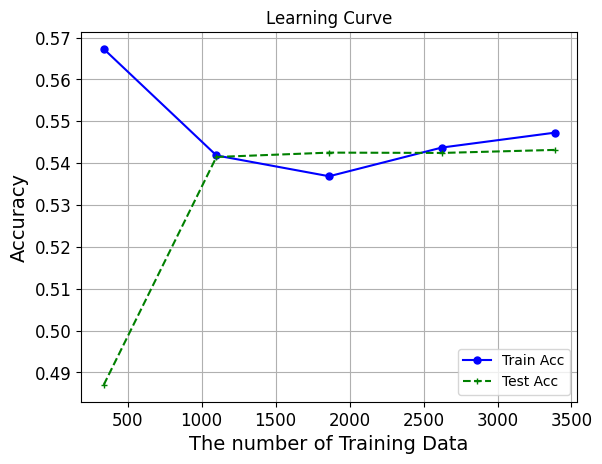

RMSE of training: 431.58028662728395


In [ ]:
Learning_Curve(Pipeline_LR,X_train, y_train)
Pipeline_LR_rmse = mean_squared_error(y_train, Pipeline_LR.predict(X_train), squared=False)
print("RMSE of training:",Pipeline_LR_rmse) 

Now two other, different regression models (that you probably won't be familiar with) will be fit and later these will be compared to find the best one.

The second model to fit is ***Kernel Ridge*** regression (`from sklearn.kernel_ridge import KernelRidge`). **Build a pipeline using this and fit it to your training data**, using the default settings. Again, **plot the fit and display the rmse for the training dataset.**

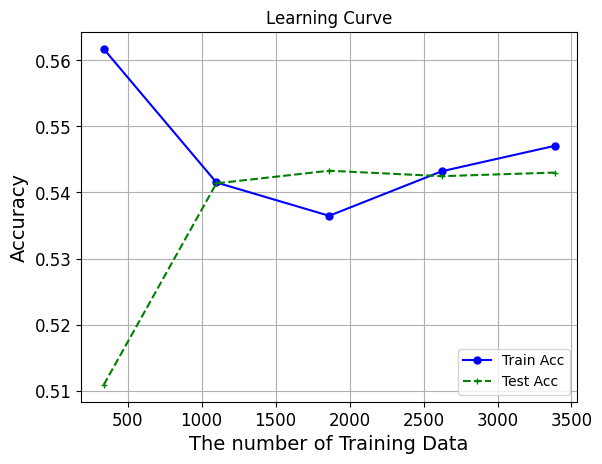

RMSE of training: 431.6787512333651


In [ ]:
### Your code here
from sklearn.kernel_ridge import KernelRidge
from sklearn.preprocessing import MinMaxScaler
Pipeline_KR = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', MinMaxScaler()),
    ('KernelRidge', KernelRidge(alpha=1.0))
])
Pipeline_KR.fit(X_train, y_train)
Learning_Curve(Pipeline_KR,X_train, y_train)

KrTrain_rmse = mean_squared_error(y_train,  Pipeline_KR.predict(X_train), squared=False)
print("RMSE of training:",KrTrain_rmse)

The third, and most powerful model, is ***Support Vector Regression*** (`from sklearn.svm import SVR`). **Build a pipeline using this and fit it to your training data**, using the default settings. Again, **plot the fit and display the rmse for the training dataset.**

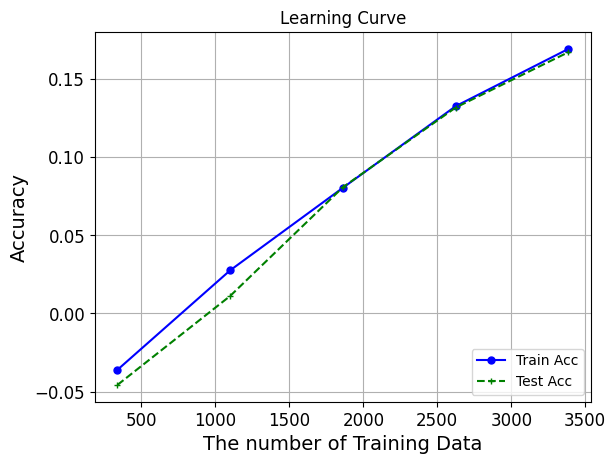

RMSE of training: 543.2831111029517


In [ ]:
### Your code here
from sklearn.svm import SVR
Pipeline_SVR = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', MinMaxScaler()),
    ('SVR', SVR(C=1.0, epsilon=0.4))
])

Pipeline_SVR.fit(X_train, y_train)
Learning_Curve(Pipeline_SVR,X_train, y_train)

SvrTrain_rmse = mean_squared_error(y_train,  Pipeline_SVR.predict(X_train), squared=False)
print("RMSE of training:",SvrTrain_rmse)

## Step 4: Cross validation (20%)

**Perform a *10 fold cross validation* for each model.** This splits the training set (that we've used above) into 10 equal size subsets, and uses each in turn as the validation set while training a model with the other 9. You should therefore have 10 rmse values for each cross validation run.

**Display the mean and standard deviation of the rmse values** obtained for each model **for the validation splits** using the same settings/parameters for the models as used above. **Also display the mean and standard deviation** of the rmse values obtained for the **training data splits**.

In [ ]:
### Your code here
def calculate_mean_rmse_std( pipeline, X, y, scoring):
    from sklearn.model_selection import cross_validate
    scores = cross_validate(pipeline, X=X, y=y, cv=10, scoring=scoring, return_train_score=True)
    print("- Cross validation score: \n" , scores['train_score'],
        "\n- Mean of RMSE:", - np.mean(scores['train_score']),
        "\n- Standard deviantion of RMSE:", np.std(scores['train_score']) )


In [ ]:
print("Linnear Regression Model")
calculate_mean_rmse_std(Pipeline_LR, X_train, y_train, 'neg_root_mean_squared_error')
print("------------------------------------------------------------------------")
print("Kernel Ridge model")
calculate_mean_rmse_std(Pipeline_KR, X_train, y_train, 'neg_root_mean_squared_error')
print("------------------------------------------------------------------------")
print("Support Vector Regression model")
calculate_mean_rmse_std(Pipeline_SVR, X_train, y_train, 'neg_root_mean_squared_error')

Linnear Regression Model
- Cross validation score: 
 [-430.36041158 -432.35505898 -429.46018509 -433.67827053 -433.16029218
 -432.10117765 -431.06966465 -430.07184779 -434.84422951 -428.68586991] 
- Mean of RMSE: 431.57870078665366 
- Standard deviantion of RMSE: 1.8793495683714991
------------------------------------------------------------------------
Kernel Ridge model
- Cross validation score: 
 [-430.37270972 -432.4824602  -429.55300184 -433.6445346  -433.22447804
 -432.16224965 -431.13699751 -430.06086147 -434.95216929 -428.7406754 ] 
- Mean of RMSE: 431.6330137703778 
- Standard deviantion of RMSE: 1.8866782958246917
------------------------------------------------------------------------
Support Vector Regression model
- Cross validation score: 
 [-548.9584062  -551.03013165 -548.28936848 -552.33301919 -551.70880372
 -548.85151789 -548.17656202 -547.61587995 -554.16091782 -544.74903896] 
- Mean of RMSE: 549.5873645872877 
- Standard deviantion of RMSE: 2.587401254015271


On the basis of the results you found above, would you say that any of the models were **under-fitting or over-fitting**?  

**Which method do you think is the best** out of these three?

In [ ]:
### Your answer here


**Answer:**

Comparing the results of the three models, the best model is the Linnear Regression Model because it has the lowest RMSE value. In addition, the Linear Regression model has the lowest standard deviation, which means that the model is more stable than the other two models. The result of Kernel Ridge Regression model is still good because it has the nearly RMSE value and the standard deviation with Linear Regression model. 

However, although the results of the three models can be acceptable, these still have to underfit, we need to improve the model by using the GridSearchCV method to find the best parameters for the model.

## Step 5: Grid parameter search (15%)

Both the Kernel Ridge Regression and Support Vector Regression have hyperparameters that can be adjusted to suit the problem. **Choose either the KernelRidge or SVR** (your choice entirely), and use grid search to systematically compare the generalisation performance (rmse) obtained with different hyperparameter settings (still with 10-fold CV). Use the sklearn function `GridSearchCV` to do this.

For KernelRidge, vary the hyperparameter `alpha`.

For SVR, vary the hyperparameter `C`.

**Print out the hyperparameter setting** for the best (i.e. chosen) method.

Finally, **train and apply your chosen method**, with appropriate hyperparameter settings, to the ***test set* and report the performance**.

In [ ]:
### Your code here
from sklearn.model_selection import GridSearchCV

hyperparameters = {'SVR__C':[0.1, 1, 5, 10, 20, 50, 100, 200]} #, 400, 600, 800, 1000]}
model_grid  = GridSearchCV(Pipeline_SVR, hyperparameters)
model_grid.fit(X_train, y_train)
print(f"The best parameter is: " f"{model_grid.best_params_}")

The best parameter is: {'SVR__C': 200}


In [ ]:
def cal_rmse( pipeline, X, y, scoring):
    from sklearn.model_selection import cross_validate
    scores = cross_validate(pipeline, X=X, y=y, cv=10, scoring=scoring, return_train_score=True)
    print("- Mean of RMSE:", - np.mean(scores['train_score']))

In [ ]:
Pipeline_SVR.set_params(**model_grid.best_params_)

# Get evaluation values
cal_rmse(Pipeline_SVR, X_train, y_train, 'neg_root_mean_squared_error')
cal_rmse(Pipeline_SVR, X_test, y_test, 'neg_root_mean_squared_error')

- Mean of RMSE: 351.8831440193252
- Mean of RMSE: 376.3546600569524


**How different was the test set performance to the validation performance, and is this suggestive of over-fitting, under-fitting or neither?**

In [ ]:
### Your answers here


**Answer**

In this question 4, the results recorded indicate the Support Vector Regression(SVR) model has the lowest accuracy, also the highest in RMSE (>500). This is the reason I choose the SVM for this question. As we can see, the RMSE when we apply the best parameter is decrease with 352 on the train set and 376 on the test set. This means when we apply the best parameter, the model is more accurate than the default parameter. However, the model is still underfitting because the RMSE is still high.

The model can be improved further if we adjust some parameters such as epsilon, gamma, and kernel. Moreover, when I increase the parameter C, the performance of the model is better, but C is a regularization parameter, we need to consider this when increasing because sometimes it makes high tolerant linear kernels.